# Credit Risk Assesment

## Importing the libraries

In [301]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from matplotlib import pyplot as plt

## Data preprocessing

In [302]:
data = pd.read_csv('credit_risk_dataset.csv')

In [303]:
def convert_bools(data):
    map_dict = {'Y': 1, 'N': 0}
    data = data.replace(map_dict)
    return data
data = convert_bools(data)

C:\Users\naman\AppData\Local\Temp\ipykernel_18976\13257729.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(map_dict)


In [304]:
data = pd.get_dummies(data, columns = ['person_home_ownership', 'loan_intent'], drop_first = True, prefix = ['Home', 'Intent'])

In [305]:
X = data.drop('loan_status', axis = 1)
y = data['loan_status']

In [306]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [307]:
X = X.astype(float)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [309]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [310]:
model = XGBClassifier(random_state = 12)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluating the model

In [311]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5032   72]
 [ 418  995]]


In [312]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.924812030075188


In [313]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = StratifiedKFold(n_splits= 5))
print(f"Average Accuracy: {accuracies.mean()*100: .2f}%")
print(f"Standard Deviation of Accuracy: {accuracies.std()*100: .2f}%")

Average Accuracy:  92.33%
Standard Deviation of Accuracy:  0.22%


In [314]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.8024193548387096


In [315]:
roc = roc_auc_score(y_test, y_pred)
print(roc)

0.8450344650103051


## Generating the ROC Curve

In [316]:
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

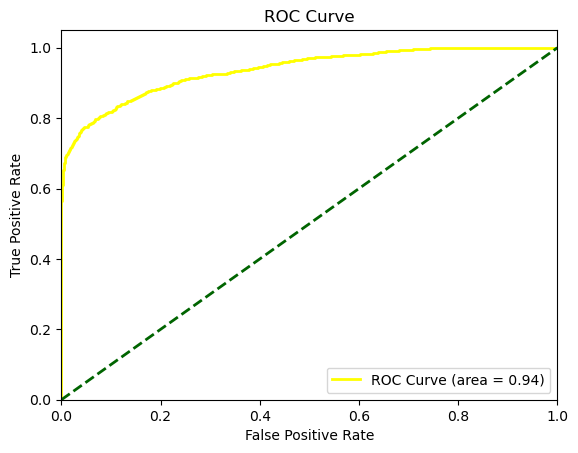

In [317]:
plt.figure()
plt.plot(fpr, tpr, color = 'yellow', lw = 2, label = f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'darkgreen', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()